__1__. Подберите скорость обучения (alpha) и количество итераций

In [1]:
import numpy as np

Предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [5]:
n = X.shape[1]
alpha = 0.055
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(350):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 50 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,6)}')

Number of objects = 10        
Learning rate = 0.055        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.94  21.235], MSE = 3047.75
Iteration #50: W_new = [41.1878031   4.51512452], MSE = 51.731698
Iteration #100: W_new = [44.59596824  3.89709834], MSE = 44.08032
Iteration #150: W_new = [44.99415142  3.82489396], MSE = 43.971126
Iteration #200: W_new = [45.05053954  3.81466884], MSE = 43.968822
Iteration #250: W_new = [45.06004142  3.81294582], MSE = 43.968753
Iteration #300: W_new = [45.06191523  3.81260604], MSE = 43.96875


In [6]:
import matplotlib.pyplot as plt

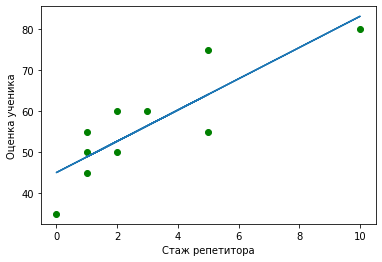

In [7]:
plt.scatter(X[1], y, color='g')
plt.plot(X[1], y_pred)
plt.xlabel('Стаж репетитора')
plt.ylabel('Оценка ученика')
plt.show()

__2__. Избавляемся от итераций по весам

In [8]:
n = X.shape[1]
alpha = 0.055
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(350):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    # W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W -= alpha * (1/n * 2 * X @ (y_pred - y))
    W_pred = W
    if i % 50 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,6)}')

Number of objects = 10        
Learning rate = 0.055        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.94  21.235], MSE = 3047.75
Iteration #50: W_new = [42.06149781  4.63338341], MSE = 50.327854
Iteration #100: W_new = [44.83109194  3.86174724], MSE = 43.998058
Iteration #150: W_new = [45.04477934  3.81590517], MSE = 43.968915
Iteration #200: W_new = [45.06114621  3.81275054], MSE = 43.968751
Iteration #250: W_new = [45.06239666  3.81251887], MSE = 43.96875
Iteration #300: W_new = [45.06249211  3.81250143], MSE = 43.96875


__3__. Задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога

In [9]:
n = X.shape[1]
alpha = 0.055
tolerance=0.000001
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nTolerance = {tolerance} \
       \nInitial weights = {W} \n')
errors = [1,0]
i = 0
while abs(errors[-1]-errors[-2]) > tolerance:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    errors.append(err)
    W -= alpha * (1/n * 2 * X @ (y_pred - y))
    W_pred = W
    i += 1

print(f'Iteration № {i}: W_new = {W}, MSE = {round(err,6)}')

Number of objects = 10        
Learning rate = 0.055        
Tolerance = 1e-06        
Initial weights = [1.  0.5] 

Iteration № 180: W_new = [45.05850408  3.81320133], MSE = 43.968758
